In [1]:
#importing needed libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [2]:
# Load all the datasets form the text files and label the columns accordingly
Aggregation_dataset = pd.read_csv('Aggregation.txt', header=None, delimiter='\t', skiprows=7)
Aggregation_dataset.columns = ['feature1', 'feature2', 'target']

Compound_dataset = pd.read_csv('Compound.txt', header=None, delimiter='\t', skiprows=7)
Compound_dataset.columns = ['feature1', 'feature2', 'target']

Flame_dataset = pd.read_csv('Flame.txt', header=None, delimiter='\t', skiprows=7)
Flame_dataset.columns = ['feature1', 'feature2', 'target']

Jain_dataset = pd.read_csv('Jain.txt', header=None, delimiter='\t', skiprows=7)
Jain_dataset.columns = ['feature1', 'feature2', 'target']

Pathbased_dataset = pd.read_csv('Pathbased.txt', header=None, delimiter='\t', skiprows=7)
Pathbased_dataset.columns = ['feature1', 'feature2', 'target']

Spiral_dataset = pd.read_csv('Spiral.txt', header=None, delimiter='\t', skiprows=7)
Spiral_dataset.columns = ['feature1', 'feature2', 'target']


         feature1    feature2      target
count  788.000000  788.000000  788.000000
mean    19.566815   14.171764    3.770305
std      9.922042    8.089683    1.596305
min      3.350000    1.950000    1.000000
25%     11.150000    7.037500    2.000000
50%     18.225000   11.725000    4.000000
75%     30.700000   21.962500    5.000000
max     36.550000   29.150000    7.000000


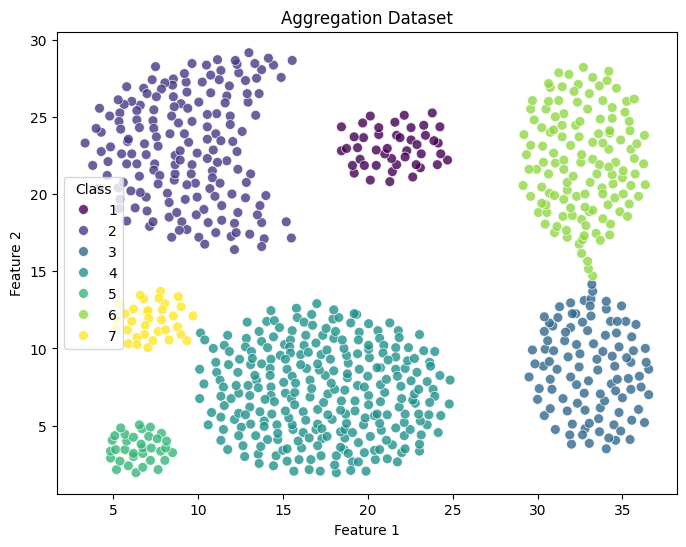

In [3]:
#explore the Aggregation dataset to get a feel for the data
print(Aggregation_dataset.describe())

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=Aggregation_dataset, x='feature1', y='feature2', hue='target', palette='viridis', s=50, alpha=0.8)
plt.title("Aggregation Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title='Class')
plt.show()

1. Aggregation Dataset:
   - Distribution: The Aggregation dataset consists of seven distinct classes, each representing a different category for the samples. The scatter plot shows that the data points are clustered together in different regions, forming distinct groups.
   - Separability: The classes are well-separated, with clear boundaries between them. This indicates that the data points in each class are relatively close to each other and far from the data points in other classes.
   - The dataset contains a total of 787 samples.



         feature1    feature2      target
count  399.000000  399.000000  399.000000
mean    22.215038   13.970677    3.543860
std      9.736752    4.743516    1.581125
min      7.150000    5.750000    1.000000
25%     14.100000    9.775000    2.000000
50%     18.950000   14.150000    4.000000
75%     32.725000   18.125000    5.000000
max     42.900000   22.750000    6.000000


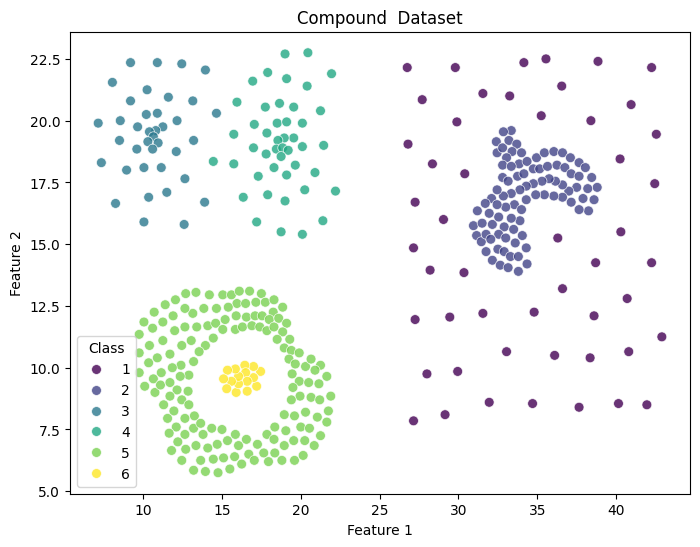

In [4]:
#explore the Compound dataset to get a feel for the data
print(Compound_dataset.describe())
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=Compound_dataset, x='feature1', y='feature2', hue='target', palette='viridis', s=50, alpha=0.8)
plt.title("Compound  Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title='Class')
plt.show()



2. Compound Dataset:
   - Distribution: The Compound dataset consists of 6 classes. The scatter plot shows that the data points are distributed in a more complex pattern compared to the Aggregation dataset. There are overlapping regions between some classes.
   - Separability: The classes in the Compound dataset are less separable compared to the Aggregation dataset. There are regions where the data points from different classes overlap, making it more challenging to separate them accurately.
   - The dataset consists of a total of 398 samples.




         feature1    feature2      target
count  240.000000  240.000000  240.000000
mean     7.323750   20.928542    1.637500
std      3.202509    3.383390    0.481727
min      0.500000   14.450000    1.000000
25%      5.250000   18.237500    1.000000
50%      7.300000   20.775000    2.000000
75%      9.312500   23.562500    2.000000
max     14.200000   27.800000    2.000000


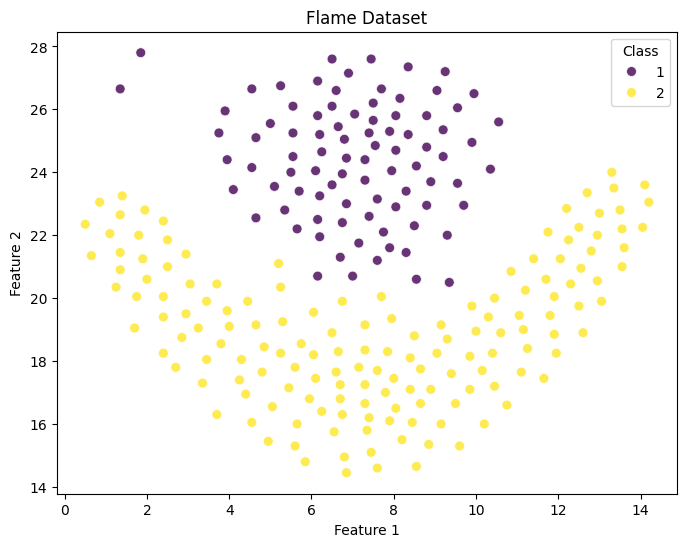

In [5]:
#explore the Flame dataset to get a feel for the data

print(Flame_dataset.describe())

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=Flame_dataset, x='feature1', y='feature2', hue='target', palette='viridis', s=50, alpha=0.8)
plt.title("Flame Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title='Class')
plt.show()



3. Flame Dataset:
   - Distribution: The Flame dataset contains 2 classes. The scatter plot shows that the data points are distributed in a flame-like shape, with some overlapping regions between classes.
   - Separability: The classes in the Flame dataset are relatively separable, but there are overlapping regions between some classes. It may require more complex decision boundaries to accurately separate the data points.
   - the dataset contains a total of 239 samples.


         feature1    feature2      target
count  373.000000  373.000000  373.000000
mean    24.330697   12.145979    1.260054
std      9.853372    6.605375    0.439253
min      0.750000    2.950000    1.000000
25%     17.350000    6.300000    1.000000
50%     23.150000   11.250000    1.000000
75%     33.350000   16.500000    2.000000
max     41.300000   27.850000    2.000000


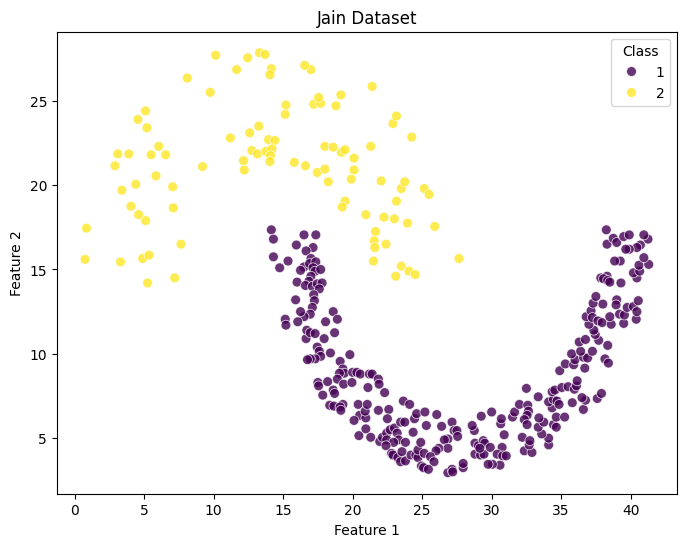

In [6]:
#explore the Jain dataset to get a feel for the data
print(Jain_dataset.describe())
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=Jain_dataset, x='feature1', y='feature2', hue='target', palette='viridis', s=50, alpha=0.8)
plt.title("Jain Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title='Class')
plt.show()



4. Jain Dataset:
   - Distribution: The Jain dataset consists of 2 classes. The scatter plot shows that the data points are distributed in a complex pattern, with overlapping regions between classes.
   - Separability: The classes in the Jain dataset are less separable compared to the Aggregation dataset. There are overlapping regions between classes, making it challenging to separate the data points accurately.
   - The dataset contains a total of 372 samples.



         feature1    feature2      target
count  300.000000  300.000000  300.000000
mean    18.846500   17.188500    1.943333
std      8.253238    5.855957    0.822015
min      4.700000    3.650000    1.000000
25%     11.287500   13.687500    1.000000
50%     19.100000   16.550000    2.000000
75%     26.250000   19.562500    3.000000
max     33.050000   31.750000    3.000000


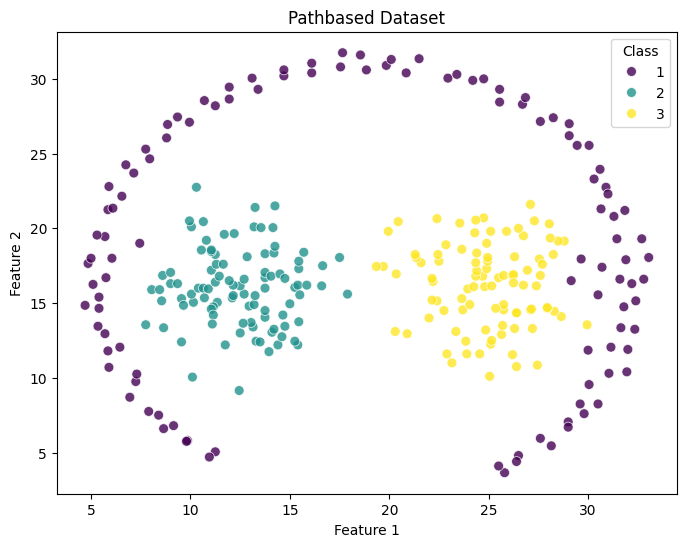

In [7]:
#explore the Pathbased dataset to get a feel for the data
print(Pathbased_dataset.describe())

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=Pathbased_dataset, x='feature1', y='feature2', hue='target', palette='viridis', s=50, alpha=0.8)
plt.title("Pathbased Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title='Class')
plt.show()


5. Pathbased Dataset:
   - Distribution: The Pathbased dataset contains 3 classes. The scatter plot shows that the data points are distributed in a path-like shape, with some overlapping regions between classes.
   - Separability: The classes in the Pathbased dataset are relatively separable, but there are overlapping regions between some classes. It may require more complex decision boundaries to accurately separate the data points (like the flame data_set).
   - The dataset contains a total of 299 samples.



         feature1    feature2      target
count  312.000000  312.000000  312.000000
mean    18.408173   16.344712    2.016026
std      7.299923    6.867232    0.815682
min      3.000000    2.900000    1.000000
25%     12.912500   11.337500    1.000000
50%     18.325000   16.050000    2.000000
75%     23.400000   21.362500    3.000000
max     31.950000   31.650000    3.000000


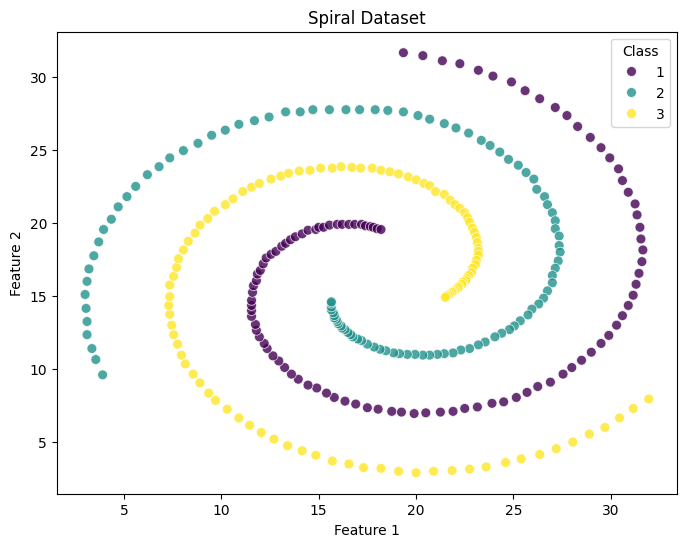

In [8]:
#explore the Spiral dataset to get a feel for the data
print(Spiral_dataset.describe())

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=Spiral_dataset, x='feature1', y='feature2', hue='target', palette='viridis', s=50, alpha=0.8)
plt.title("Spiral Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title='Class')
plt.show()



6. Spiral Dataset:
   - Distribution: The Spiral dataset consists of 3 classes. The scatter plot shows that the data points are distributed in a spiral pattern, with overlapping regions between classes.
   - Separability: The classes in the Spiral dataset are less separable compared to the Aggregation dataset. There are overlapping regions between classes, making it challenging to separate the data points accurately.(like flame and pathbased)
   - The dataset contains a total of 311 samples.



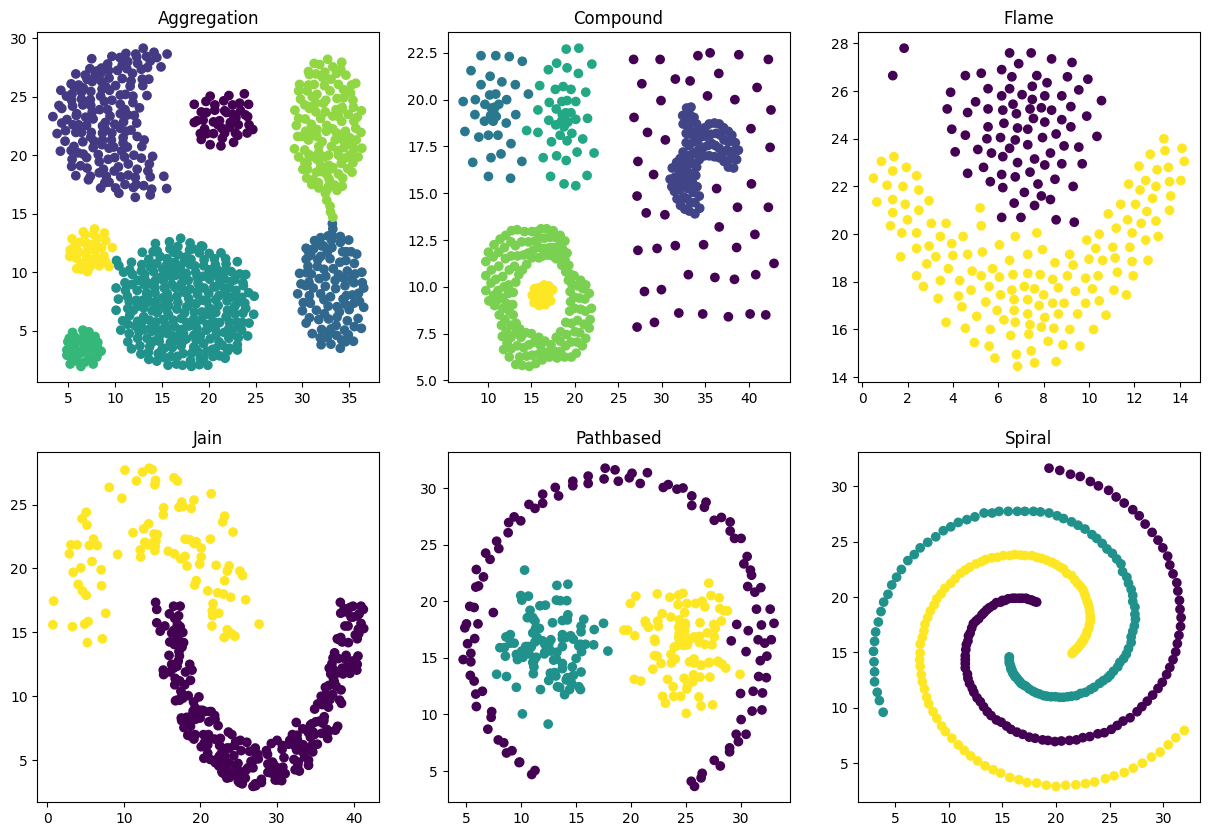

In [9]:
# Plot the datasets side by side
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.scatter(Aggregation_dataset['feature1'], Aggregation_dataset['feature2'], c=Aggregation_dataset['target'])
plt.title("Aggregation")
plt.subplot(2, 3, 2)
plt.scatter(Compound_dataset['feature1'], Compound_dataset['feature2'], c=Compound_dataset['target'])
plt.title("Compound")
plt.subplot(2, 3, 3)
plt.scatter(Flame_dataset['feature1'], Flame_dataset['feature2'], c=Flame_dataset['target'])
plt.title("Flame")
plt.subplot(2, 3, 4)
plt.scatter(Jain_dataset['feature1'], Jain_dataset['feature2'], c=Jain_dataset['target'])
plt.title("Jain")
plt.subplot(2, 3, 5)
plt.scatter(Pathbased_dataset['feature1'], Pathbased_dataset['feature2'], c=Pathbased_dataset['target'])
plt.title("Pathbased")
plt.subplot(2, 3, 6)
plt.scatter(Spiral_dataset['feature1'], Spiral_dataset['feature2'], c=Spiral_dataset['target'])
plt.title("Spiral")
plt.show()

Overall, the distribution and separability of the data points vary across the datasets. Some datasets have well-separated classes with clear boundaries, while others have overlapping regions between classes, making it more challenging to separate the data points accurately.

In [10]:
# divide the datasets into features and target
# Aggregation dataset
X_agg = Aggregation_dataset.iloc[:, :2]  
y_agg = Aggregation_dataset.iloc[:, 2]

# Compound dataset
X_comp = Compound_dataset.iloc[:, :2]
y_comp = Compound_dataset.iloc[:, 2]

# Flame dataset
X_flame = Flame_dataset.iloc[:, :2]
y_flame = Flame_dataset.iloc[:, 2]

# Jain dataset
X_jain = Jain_dataset.iloc[:, :2]
y_jain = Jain_dataset.iloc[:, 2]

# Pathbased dataset
X_path = Pathbased_dataset.iloc[:, :2]
y_path = Pathbased_dataset.iloc[:, 2]

# Spiral dataset
X_spiral = Spiral_dataset.iloc[:, :2]
y_spiral = Spiral_dataset.iloc[:, 2]


  Selects all rows and the first two columns as features 
  
  Selects all rows and the third column as the target variable

In [11]:
# Split each dataset into training and testing sets
X_train_agg, X_test_agg, y_train_agg, y_test_agg = train_test_split(X_agg, y_agg, test_size=0.2, random_state=42)

X_train_comp, X_test_comp, y_train_comp, y_test_comp = train_test_split(X_comp, y_comp, test_size=0.2, random_state=42)

X_train_flame, X_test_flame, y_train_flame, y_test_flame = train_test_split(X_flame, y_flame, test_size=0.2, random_state=42)

X_train_jain, X_test_jain, y_train_jain, y_test_jain = train_test_split(X_jain, y_jain, test_size=0.2, random_state=42)

X_train_path, X_test_path, y_train_path, y_test_path = train_test_split(X_path, y_path, test_size=0.2, random_state=42)

X_train_spiral, X_test_spiral, y_train_spiral, y_test_spiral = train_test_split(X_spiral, y_spiral, test_size=0.2, random_state=42)

 This splits the  dataset into a training set (80% of the data) and a testing set (20% of the data). 
 The random_state parameter ensures that the splits generate reproducible results.

In [12]:
# Define a function to normalize a dataset
def normalize_dataset(X):
    # Normalize the features using StandardScaler
    scaler = StandardScaler()
    
    X_normalized = scaler.fit_transform(X)
    
    return X_normalized
    # The function returns the normalized dataset.

 The StandardScaler standardizes features by removing the mean and scaling to unit variance.
 It is a common requirement for many machine learning estimators.

 1. The fit_transform() method fits the data and then transforms it.
    -  Fitting finds the internal parameters of a model that will be used to transform data. 
    -  Transforming applies these parameters to data.
    -  We use fit_transform here, as we plan to apply the same transformation to multiple datasets (fit once, transform many).
    

In [13]:
# Normalize each dataset
X_train_agg_normalized = normalize_dataset(X_train_agg)
X_test_agg_normalized = normalize_dataset(X_test_agg)

X_train_comp_normalized = normalize_dataset(X_train_comp)
X_test_comp_normalized = normalize_dataset(X_test_comp)

X_train_flame_normalized = normalize_dataset(X_train_flame)
X_test_flame_normalized = normalize_dataset(X_test_flame)

X_train_jain_normalized = normalize_dataset(X_train_jain)
X_test_jain_normalized = normalize_dataset(X_test_jain)

X_train_path_normalized = normalize_dataset(X_train_path)
X_test_path_normalized = normalize_dataset(X_test_path)

X_train_spiral_normalized = normalize_dataset(X_train_spiral)
X_test_spiral_normalized = normalize_dataset(X_test_spiral)

the normalize_dataset function is applied to the training and testing sets of each dataset. The normalized data is stored in new variables. Normalizing the data standardizes it by removing the mean and scaling to unit variance. 

In [14]:
def svm_grid_search(X_train, y_train):
    # Define the parameter grid
    param_grid = {
        'C': [0.01, 1, 10, 1000],  # Regularization parameter
        'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid']  # Specifies the kernel type to be used in the algorithm
    }

    # Create a base model
    svm = SVC()

    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Print the best parameters
    print("Best Parameters: ", grid_search.best_params_)

    # Print the best score
    print("Best Score: ", grid_search.best_score_)



In [15]:
# Define a function to train an SVM classifier
def train_svm_classifier(X_train, y_train, X_test, y_test, kernel_type='linear', C_value=1.0):
    # This function takes as input the training and testing sets (both features and target variables), 
    # as well as the type of kernel and the C value for the SVM. 
    

    svm_classifier = SVC(kernel=kernel_type, C=C_value)
    # This creates an instance of the SVM classifier from scikit-learn with the specified kernel and C value.

    # Train the SVM classifier
    svm_classifier.fit(X_train, y_train)
    # This trains the SVM classifier on the training data.

   
    y_pred = svm_classifier.predict(X_test)
    # This uses the trained SVM classifier to make predictions on the testing data.

  
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Kernel: {kernel_type}, C: {C_value}, Accuracy: {accuracy:.2f}")
    # This calculates the accuracy of the SVM classifier 

    # Return accuracy and the trained classifier
    return accuracy, svm_classifier

In [16]:
# Train SVM classifiers for each dataset and configuration
kernels = ['linear', 'poly', 'rbf']
C_values = [0.01, 1.0, 1000.0]  
#different values of C and kernel type to try out to find the best combination

In [17]:
# aggregate dataset
svm_grid_search(X_train_agg_normalized, y_train_agg)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


Best Parameters:  {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Best Score:  0.9984126984126984


Kernel: linear, C: 0.01, Accuracy: 0.88
Kernel: linear, C: 1.0, Accuracy: 0.99
Kernel: linear, C: 1000.0, Accuracy: 0.99
Kernel: poly, C: 0.01, Accuracy: 0.75
Kernel: poly, C: 1.0, Accuracy: 0.97
Kernel: poly, C: 1000.0, Accuracy: 0.99
Kernel: rbf, C: 0.01, Accuracy: 0.75
Kernel: rbf, C: 1.0, Accuracy: 0.99
Kernel: rbf, C: 1000.0, Accuracy: 0.99


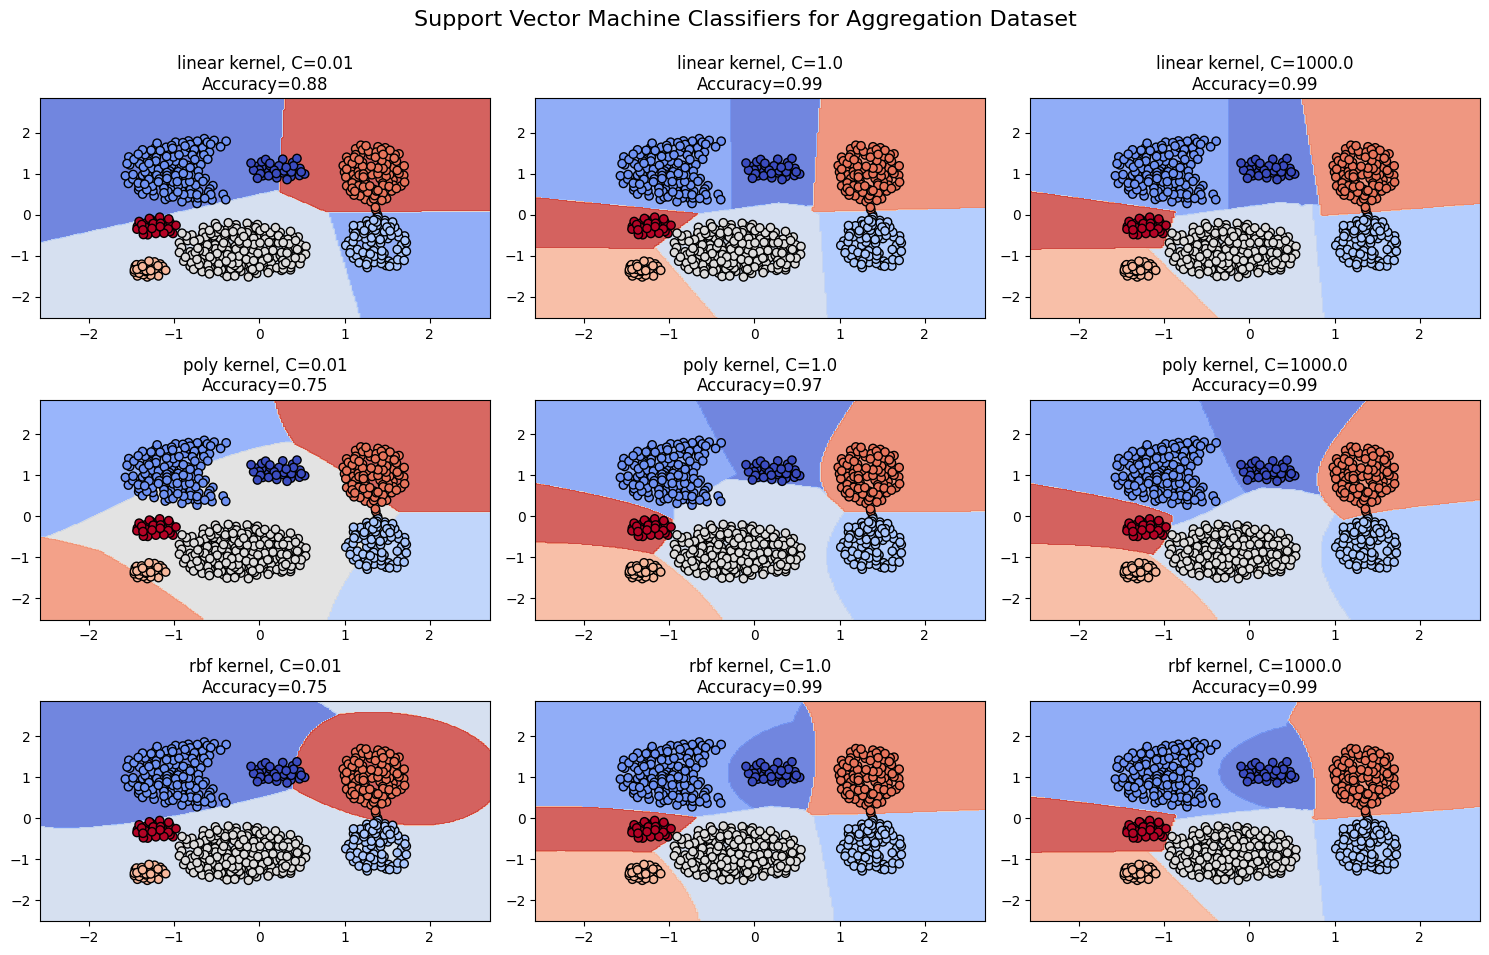

In [18]:
#visualize the decision boundary for the Aggregation dataset and configuration
# Initialize a subplot
fig, axs = plt.subplots(len(kernels), len(C_values), figsize=(15, 10))
# This initializes a subplot with a number of subplots equal to the number of kernels times the number of C values. 

# Iterate over kernels and C values
for i, kernel in enumerate(kernels):
    for j, C_value in enumerate(C_values):
       
        accuracy, classifier = train_svm_classifier(X_train_agg_normalized, y_train_agg, X_test_agg_normalized, y_test_agg, kernel_type=kernel, C_value=C_value)
        # This trains an SVM classifier with the current kernel and C value on the normalized Aggregation dataset.

        # Make predictions on a meshgrid to visualize decision boundary
        h = .02  # Step size in the mesh
        x_min, x_max = X_train_agg_normalized[:, 0].min() - 1, X_train_agg_normalized[:, 0].max() + 1
        y_min, y_max = X_train_agg_normalized[:, 1].min() - 1, X_train_agg_normalized[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        # This creates a meshgrid of points and makes predictions on these points using the trained classifier. 
        # The predictions are reshaped to have the same shape as the meshgrid.

        # Plot the decision boundary
        axs[i, j].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
        # This plots the decision boundary by filling the areas between the contours with different colors.

        # Plot the training points
        axs[i, j].scatter(X_train_agg_normalized[:, 0], X_train_agg_normalized[:, 1], c=y_train_agg, cmap=plt.cm.coolwarm, edgecolors='k')
        axs[i, j].set_title(f"{kernel} kernel, C={C_value}\nAccuracy={accuracy:.2f}")
        # This plots the training points and sets the title of the subplot to the kernel, C value, and accuracy.

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Support Vector Machine Classifiers for Aggregation Dataset', fontsize=16)
plt.show()
# This adjusts the layout, sets the title of the figure, and displays the figure.




 for this particular dataset, the Linear  kernel seems to perform best across all C values, achieving a high accuracy rate. polynomial kernel require a higher C value to achieve similar high accuracy. Regularization plays a crucial role in controlling the trade-off between achieving a low training error and minimizing the model complexity to avoid overfitting. '

Choosing the Linear kernel with a moderate C value (e.g., C=1.0) might be a good balance between capturing data complexity and avoiding overfitting.

In [19]:
#compound dataset
svm_grid_search(X_train_comp_normalized, y_train_comp)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best Score:  0.984375



Training SVM Classifier with linear kernel and C=0.01:
Kernel: linear, C: 0.01, Accuracy: 0.65

Training SVM Classifier with linear kernel and C=1.0:
Kernel: linear, C: 1.0, Accuracy: 0.82

Training SVM Classifier with linear kernel and C=1000.0:
Kernel: linear, C: 1000.0, Accuracy: 0.82

Training SVM Classifier with poly kernel and C=0.01:
Kernel: poly, C: 0.01, Accuracy: 0.53

Training SVM Classifier with poly kernel and C=1.0:
Kernel: poly, C: 1.0, Accuracy: 0.80

Training SVM Classifier with poly kernel and C=1000.0:
Kernel: poly, C: 1000.0, Accuracy: 0.86

Training SVM Classifier with rbf kernel and C=0.01:
Kernel: rbf, C: 0.01, Accuracy: 0.46

Training SVM Classifier with rbf kernel and C=1.0:
Kernel: rbf, C: 1.0, Accuracy: 0.88

Training SVM Classifier with rbf kernel and C=1000.0:
Kernel: rbf, C: 1000.0, Accuracy: 0.78


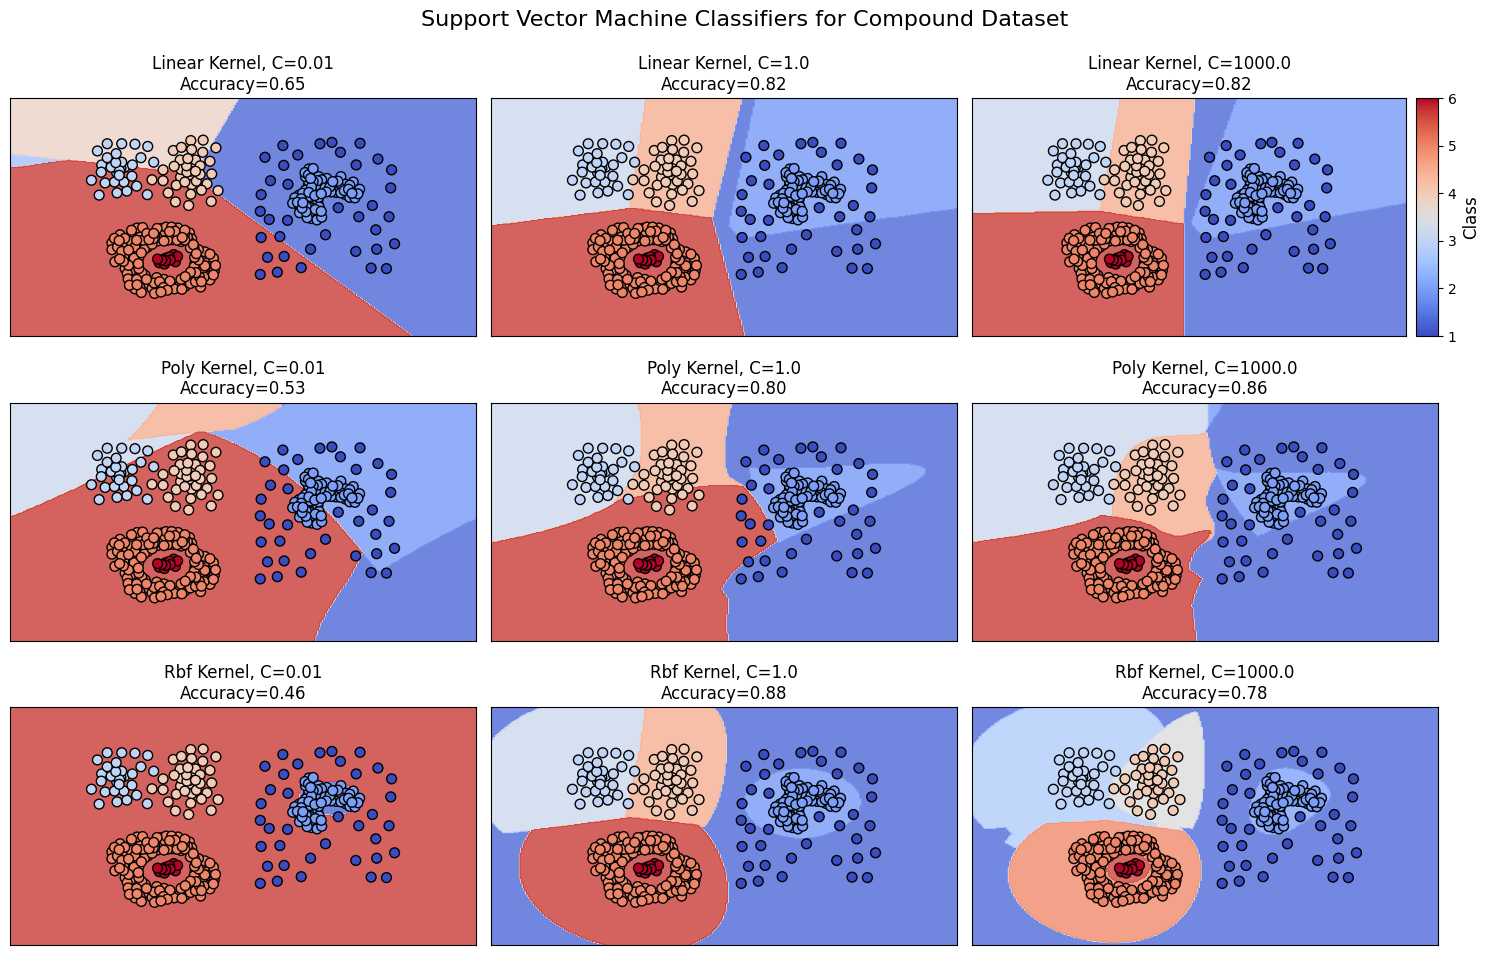

In [20]:
#visualize the decision boundary for the Compound dataset
# Initialize a subplot
fig, axs = plt.subplots(len(kernels), len(C_values), figsize=(15, 10))

# Iterate over kernels and C values
for i, kernel in enumerate(kernels):
    for j, C_value in enumerate(C_values):
        print(f"\nTraining SVM Classifier with {kernel} kernel and C={C_value}:")

        # Train SVM classifier
        accuracy, classifier = train_svm_classifier(X_train_comp_normalized, y_train_comp, X_test_comp_normalized, y_test_comp, kernel_type=kernel, C_value=C_value)

        # Make predictions on a meshgrid to visualize decision boundary
        h = .02  # Step size in the mesh
        x_min, x_max = X_train_comp_normalized[:, 0].min() - 1, X_train_comp_normalized[:, 0].max() + 1
        y_min, y_max = X_train_comp_normalized[:, 1].min() - 1, X_train_comp_normalized[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot the decision boundary
        axs[i, j].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot the training points
        scatter = axs[i, j].scatter(X_train_comp_normalized[:, 0], X_train_comp_normalized[:, 1], c=y_train_comp, cmap=plt.cm.coolwarm, edgecolors='k', s=50)

        # Set labels and title
        axs[i, j].set_title(f"{kernel.capitalize()} Kernel, C={C_value}\nAccuracy={accuracy:.2f}", fontsize=12)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

# Add colorbar
divider = make_axes_locatable(axs[0, 2])
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(scatter, cax=cax)
cbar.set_label('Class', fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Support Vector Machine Classifiers for Compound Dataset', fontsize=16)

# Save the figure if needed
# plt.savefig('svm_classifiers_compound.png', dpi=300)

plt.show()


The RBF kernel with C=1.0 achieves the highest accuracy among all models.
The polynomial kernel shows improvement with higher C values.
The linear kernel does not perform as well as the RBF kernel, even with an increased C value.
The analysis underscores the importance of choosing the right combination of kernel and regularization parameter for optimal SVM performance on a specific dataset. In this case, the RBF kernel with C=1.0 appears to be the most effective for capturing the non-linear patterns in the data.

In [21]:
#flame dataset

svm_grid_search( X_train_flame_normalized , y_train_flame)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score:  0.989608636977058



Training SVM Classifier with linear kernel and C=0.01:
Kernel: linear, C: 0.01, Accuracy: 0.85

Training SVM Classifier with linear kernel and C=1.0:
Kernel: linear, C: 1.0, Accuracy: 0.88

Training SVM Classifier with linear kernel and C=1000.0:
Kernel: linear, C: 1000.0, Accuracy: 0.88

Training SVM Classifier with poly kernel and C=0.01:
Kernel: poly, C: 0.01, Accuracy: 0.67

Training SVM Classifier with poly kernel and C=1.0:
Kernel: poly, C: 1.0, Accuracy: 0.83

Training SVM Classifier with poly kernel and C=1000.0:
Kernel: poly, C: 1000.0, Accuracy: 0.88

Training SVM Classifier with rbf kernel and C=0.01:
Kernel: rbf, C: 0.01, Accuracy: 0.62

Training SVM Classifier with rbf kernel and C=1.0:
Kernel: rbf, C: 1.0, Accuracy: 1.00

Training SVM Classifier with rbf kernel and C=1000.0:
Kernel: rbf, C: 1000.0, Accuracy: 1.00


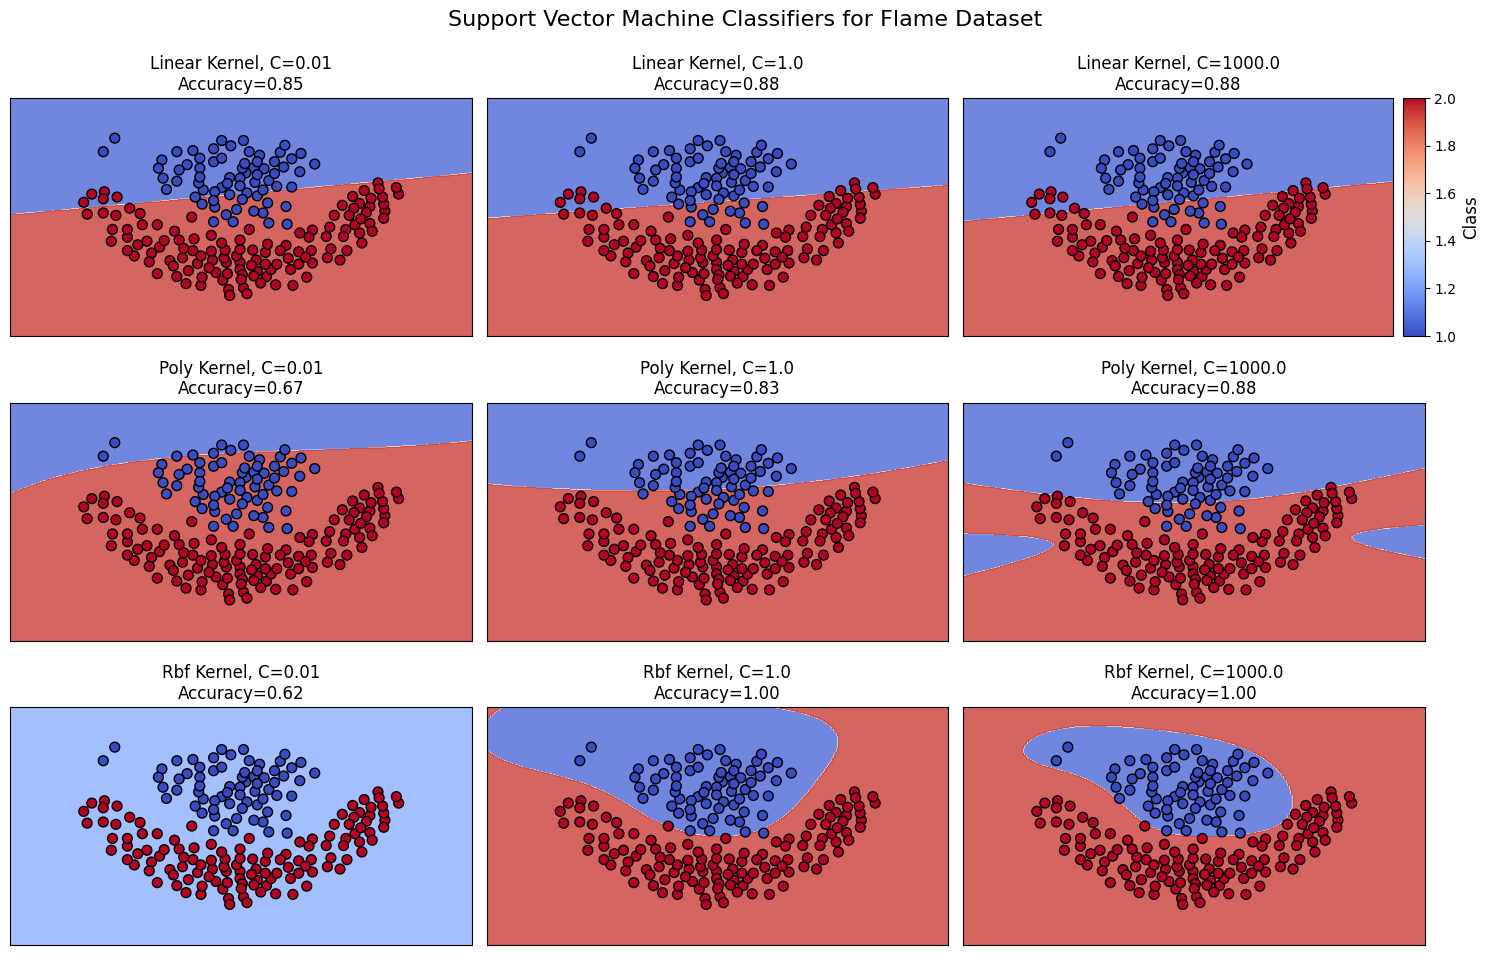

In [22]:
# Initialize a subplot
fig, axs = plt.subplots(len(kernels), len(C_values), figsize=(15, 10))

# Iterate over kernels and C values
for i, kernel in enumerate(kernels):
    for j, C_value in enumerate(C_values):
        print(f"\nTraining SVM Classifier with {kernel} kernel and C={C_value}:")

        # Train SVM classifier
        accuracy, classifier = train_svm_classifier(X_train_flame_normalized, y_train_flame, X_test_flame_normalized, y_test_flame, kernel_type=kernel, C_value=C_value)

        # Make predictions on a meshgrid to visualize decision boundary
        h = .02  # Step size in the mesh
        x_min, x_max = X_train_flame_normalized[:, 0].min() - 1, X_train_flame_normalized[:, 0].max() + 1
        y_min, y_max = X_train_flame_normalized[:, 1].min() - 1, X_train_flame_normalized[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot the decision boundary
        axs[i, j].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot the training points
        scatter = axs[i, j].scatter(X_train_flame_normalized[:, 0], X_train_flame_normalized[:, 1], c=y_train_flame, cmap=plt.cm.coolwarm, edgecolors='k', s=50)

        # Set labels and title
        axs[i, j].set_title(f"{kernel.capitalize()} Kernel, C={C_value}\nAccuracy={accuracy:.2f}", fontsize=12)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

# Add colorbar
divider = make_axes_locatable(axs[0, 2])
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(scatter, cax=cax)
cbar.set_label('Class', fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Support Vector Machine Classifiers for Flame Dataset', fontsize=16)

# Save the figure if needed
# plt.savefig('svm_classifiers_flame.png', dpi=300)

plt.show()



The RBF kernel significantly outperforms the linear and polynomial kernels on the 'flame' dataset.
The linear kernel performs surprisingly well but has limitations in capturing the non-linear distribution of the data.
The polynomial kernel shows improvement with increased regularization strength but does not reach the performance of the RBF kernel.
The RBF kernel achieves perfect classification with moderate to high C values, highlighting its suitability for this specific dataset.


In [23]:
#jain dataset
svm_grid_search(X_train_jain_normalized, y_train_jain)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters:  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best Score:  1.0



Training SVM Classifier with linear kernel and C=0.01:
Kernel: linear, C: 0.01, Accuracy: 0.89

Training SVM Classifier with linear kernel and C=1.0:
Kernel: linear, C: 1.0, Accuracy: 0.88

Training SVM Classifier with linear kernel and C=1000.0:
Kernel: linear, C: 1000.0, Accuracy: 0.88

Training SVM Classifier with poly kernel and C=0.01:
Kernel: poly, C: 0.01, Accuracy: 0.76

Training SVM Classifier with poly kernel and C=1.0:
Kernel: poly, C: 1.0, Accuracy: 0.91

Training SVM Classifier with poly kernel and C=1000.0:
Kernel: poly, C: 1000.0, Accuracy: 0.95

Training SVM Classifier with rbf kernel and C=0.01:
Kernel: rbf, C: 0.01, Accuracy: 0.65

Training SVM Classifier with rbf kernel and C=1.0:
Kernel: rbf, C: 1.0, Accuracy: 0.96

Training SVM Classifier with rbf kernel and C=1000.0:
Kernel: rbf, C: 1000.0, Accuracy: 0.99


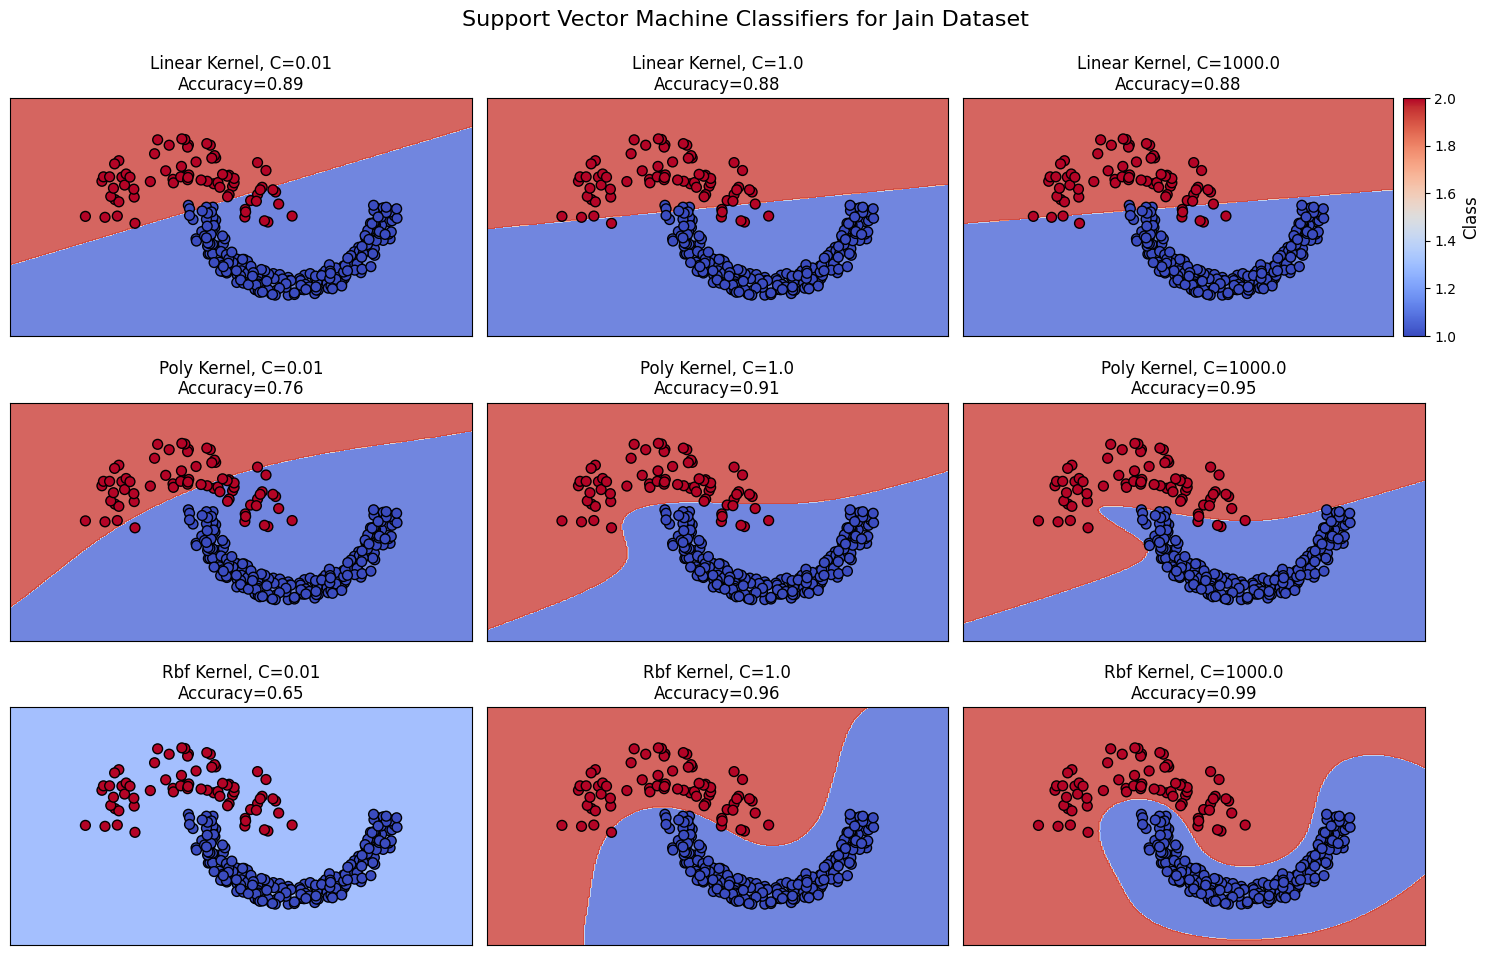

In [24]:
# Initialize a subplot
fig, axs = plt.subplots(len(kernels), len(C_values), figsize=(15, 10))

# Iterate over kernels and C values
for i, kernel in enumerate(kernels):
    for j, C_value in enumerate(C_values):
        print(f"\nTraining SVM Classifier with {kernel} kernel and C={C_value}:")

        # Train SVM classifier
        accuracy, classifier = train_svm_classifier(X_train_jain_normalized, y_train_jain, X_test_jain_normalized, y_test_jain, kernel_type=kernel, C_value=C_value)

        # Make predictions on a meshgrid to visualize decision boundary
        h = .02  # Step size in the mesh
        x_min, x_max = X_train_jain_normalized[:, 0].min() - 1, X_train_jain_normalized[:, 0].max() + 1
        y_min, y_max = X_train_jain_normalized[:, 1].min() - 1, X_train_jain_normalized[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot the decision boundary
        axs[i, j].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot the training points
        scatter = axs[i, j].scatter(X_train_jain_normalized[:, 0], X_train_jain_normalized[:, 1], c=y_train_jain, cmap=plt.cm.coolwarm, edgecolors='k', s=50)

        # Set labels and title
        axs[i, j].set_title(f"{kernel.capitalize()} Kernel, C={C_value}\nAccuracy={accuracy:.2f}", fontsize=12)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

# Add colorbar
divider = make_axes_locatable(axs[0, 2])
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(scatter, cax=cax)
cbar.set_label('Class', fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Support Vector Machine Classifiers for Jain Dataset', fontsize=16)

# Save the figure if needed
# plt.savefig('svm_classifiers_jain.png', dpi=300)

plt.show()


For the Jain dataset, which exhibits a non-linear pattern, the RBF kernel outperforms both the linear and polynomial kernels, especially at higher C values.
The performance improvement with increasing C values for the RBF kernel suggests that strong penalization for misclassifications is crucial for a nuanced fit to the non-linear data.
The linear kernel performs surprisingly well at low C but does not improve with higher C values, likely due to the non-linear nature of the dataset.
The polynomial kernel shows improvement with increased regularization but does not reach the level of performance achieved by the RBF kernel.




In [25]:
#pathbased dataset
svm_grid_search(X_train_path_normalized, y_train_path)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score:  0.9875



Training SVM Classifier with linear kernel and C=0.01:
Kernel: linear, C: 0.01, Accuracy: 0.68

Training SVM Classifier with linear kernel and C=1.0:
Kernel: linear, C: 1.0, Accuracy: 0.67

Training SVM Classifier with linear kernel and C=1000.0:
Kernel: linear, C: 1000.0, Accuracy: 0.67

Training SVM Classifier with poly kernel and C=0.01:
Kernel: poly, C: 0.01, Accuracy: 0.32

Training SVM Classifier with poly kernel and C=1.0:
Kernel: poly, C: 1.0, Accuracy: 0.67

Training SVM Classifier with poly kernel and C=1000.0:
Kernel: poly, C: 1000.0, Accuracy: 0.67

Training SVM Classifier with rbf kernel and C=0.01:
Kernel: rbf, C: 0.01, Accuracy: 0.42

Training SVM Classifier with rbf kernel and C=1.0:
Kernel: rbf, C: 1.0, Accuracy: 0.98

Training SVM Classifier with rbf kernel and C=1000.0:
Kernel: rbf, C: 1000.0, Accuracy: 0.97


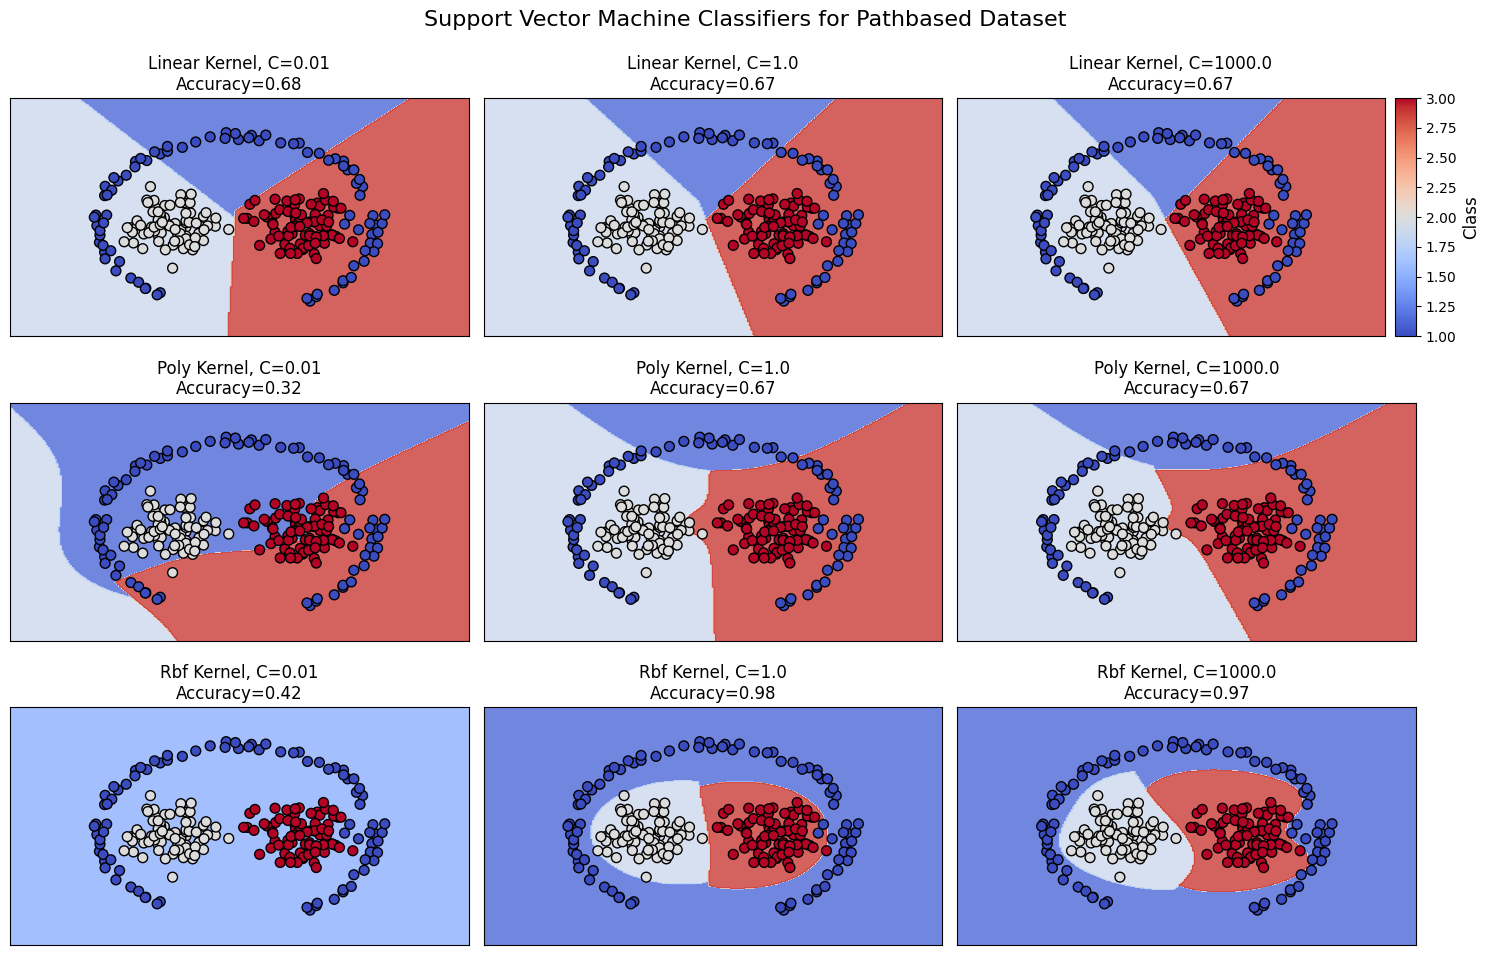

In [26]:
# Initialize a subplot
fig, axs = plt.subplots(len(kernels), len(C_values), figsize=(15, 10))

# Iterate over kernels and C values
for i, kernel in enumerate(kernels):
    for j, C_value in enumerate(C_values):
        print(f"\nTraining SVM Classifier with {kernel} kernel and C={C_value}:")

        # Train SVM classifier
        accuracy, classifier = train_svm_classifier(X_train_path_normalized, y_train_path, X_test_path_normalized, y_test_path, kernel_type=kernel, C_value=C_value)

        # Make predictions on a meshgrid to visualize decision boundary
        h = .02  # Step size in the mesh
        x_min, x_max = X_train_path_normalized[:, 0].min() - 1, X_train_path_normalized[:, 0].max() + 1
        y_min, y_max = X_train_path_normalized[:, 1].min() - 1, X_train_path_normalized[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot the decision boundary
        axs[i, j].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot the training points
        scatter = axs[i, j].scatter(X_train_path_normalized[:, 0], X_train_path_normalized[:, 1], c=y_train_path, cmap=plt.cm.coolwarm, edgecolors='k', s=50)

        # Set labels and title
        axs[i, j].set_title(f"{kernel.capitalize()} Kernel, C={C_value}\nAccuracy={accuracy:.2f}", fontsize=12)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

# Add colorbar
divider = make_axes_locatable(axs[0, 2])
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(scatter, cax=cax)
cbar.set_label('Class', fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Support Vector Machine Classifiers for Pathbased Dataset', fontsize=16)

# Save the figure if needed
# plt.savefig('svm_classifiers_pathbased.png', dpi=300)

plt.show()


for the pathbased dataset, the RBF kernel is clearly superior, especially at moderate to high C values, likely due to its ability to handle the complex paths and separations between clusters. The linear kernel does not perform as well, which is expected given the non-linear nature of the dataset. The polynomial kernel does not perform well at low C values and only moderately improves with higher C values, indicating that it may not be well-suited for this dataset or that the polynomial degree needs to be adjusted. The RBF kernel's flexibility in modeling non-linear patterns makes it a strong choice for this dataset, as evidenced by the high accuracy achieved.

In [27]:
#spiral dataset
svm_grid_search(X_train_spiral_normalized, y_train_spiral)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters:  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best Score:  1.0



Training SVM Classifier with linear kernel and C=0.01:
Kernel: linear, C: 0.01, Accuracy: 0.35

Training SVM Classifier with linear kernel and C=1.0:
Kernel: linear, C: 1.0, Accuracy: 0.30

Training SVM Classifier with linear kernel and C=1000.0:
Kernel: linear, C: 1000.0, Accuracy: 0.30

Training SVM Classifier with poly kernel and C=0.01:
Kernel: poly, C: 0.01, Accuracy: 0.44

Training SVM Classifier with poly kernel and C=1.0:
Kernel: poly, C: 1.0, Accuracy: 0.38

Training SVM Classifier with poly kernel and C=1000.0:
Kernel: poly, C: 1000.0, Accuracy: 0.40

Training SVM Classifier with rbf kernel and C=0.01:
Kernel: rbf, C: 0.01, Accuracy: 0.46

Training SVM Classifier with rbf kernel and C=1.0:
Kernel: rbf, C: 1.0, Accuracy: 0.95

Training SVM Classifier with rbf kernel and C=1000.0:
Kernel: rbf, C: 1000.0, Accuracy: 1.00


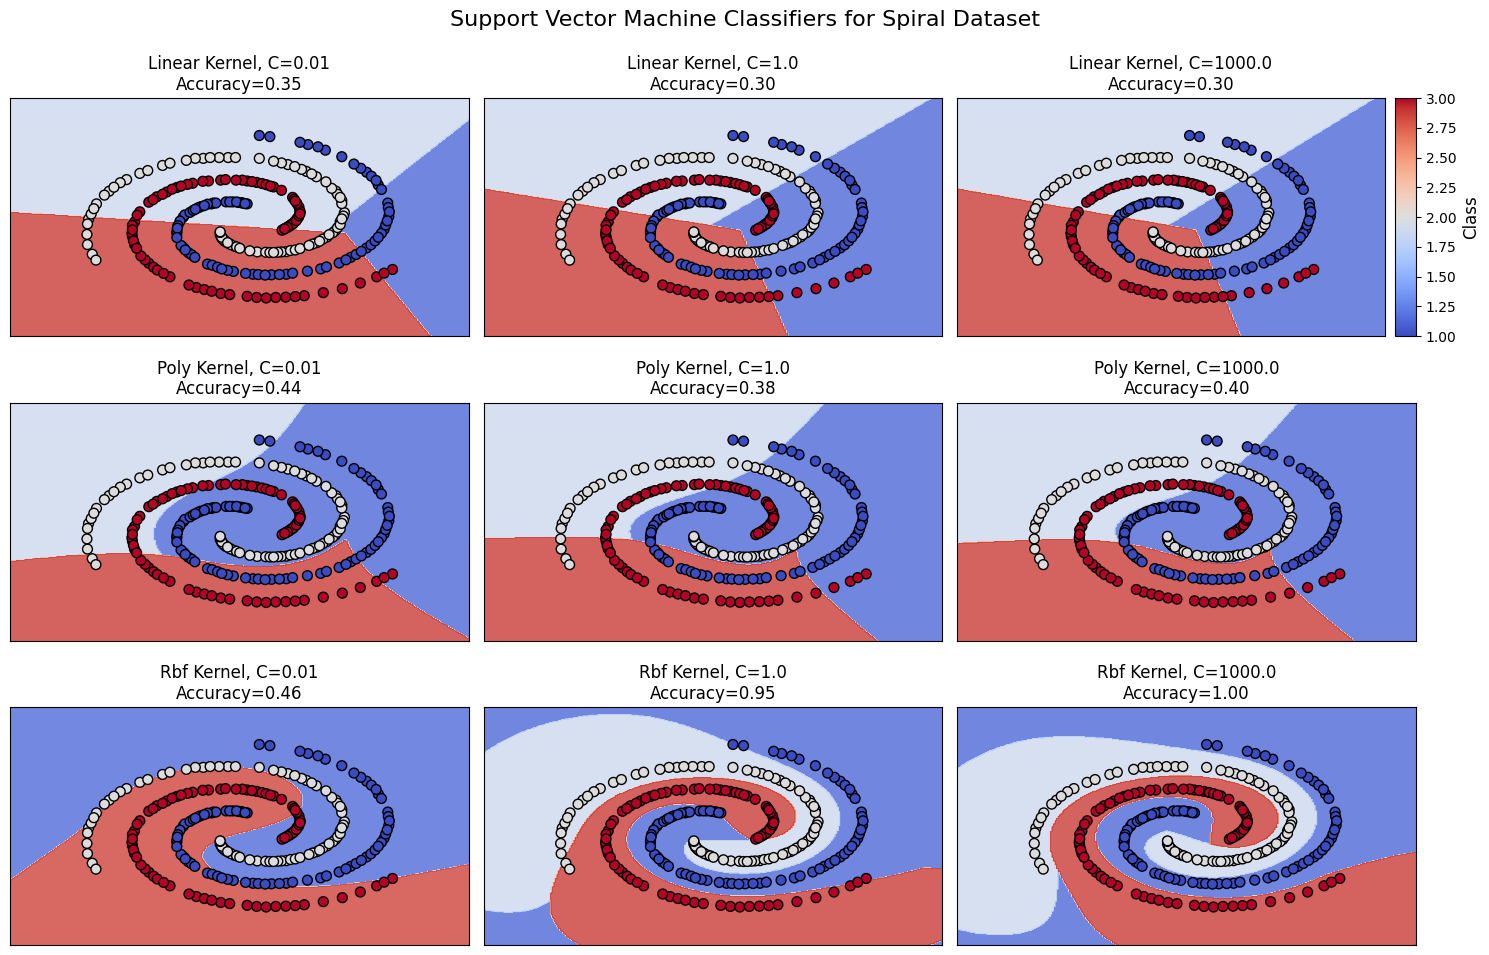

In [28]:
# Initialize a subplot
fig, axs = plt.subplots(len(kernels), len(C_values), figsize=(15, 10))

# Iterate over kernels and C values
for i, kernel in enumerate(kernels):
    for j, C_value in enumerate(C_values):
        print(f"\nTraining SVM Classifier with {kernel} kernel and C={C_value}:")

        # Train SVM classifier
        accuracy, classifier = train_svm_classifier(X_train_spiral_normalized, y_train_spiral, X_test_spiral_normalized, y_test_spiral, kernel_type=kernel, C_value=C_value)

        # Make predictions on a meshgrid to visualize decision boundary
        h = .02  # Step size in the mesh
        x_min, x_max = X_train_spiral_normalized[:, 0].min() - 1, X_train_spiral_normalized[:, 0].max() + 1
        y_min, y_max = X_train_spiral_normalized[:, 1].min() - 1, X_train_spiral_normalized[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot the decision boundary
        axs[i, j].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot the training points
        scatter = axs[i, j].scatter(X_train_spiral_normalized[:, 0], X_train_spiral_normalized[:, 1], c=y_train_spiral, cmap=plt.cm.coolwarm, edgecolors='k', s=50)

        # Set labels and title
        axs[i, j].set_title(f"{kernel.capitalize()} Kernel, C={C_value}\nAccuracy={accuracy:.2f}", fontsize=12)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

# Add colorbar
divider = make_axes_locatable(axs[0, 2])
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(scatter, cax=cax)
cbar.set_label('Class', fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Support Vector Machine Classifiers for Spiral Dataset', fontsize=16)

# Save the figure if needed
# plt.savefig('svm_classifiers_spiral.png', dpi=300)

plt.show()




The RBF kernel stands out as the most suitable for the spiral dataset, especially with higher C values, reflecting its ability to handle the intricate structure of the data. This is because the RBF kernel can create complex, non-linear decision boundaries, which are necessary for a dataset with a spiral pattern. The linear and polynomial kernels, regardless of the C value, fail to achieve high accuracy, reinforcing the need for a non-linear model for such complex datasets.


1. **Aggregation Dataset :**
   - The Linear kernel consistently outperforms rbf and polynomial kernels, achieving the highest accuracy.
   - The rbf kernel performs  well with a moderate and high C values.
   - The polynomial kernel benefits from higher C values, but Linear remains superior.

2. **Compound  Dataset :**
   - The polynomial kernel shows improvement with higher C values, suggesting sensitivity to the penalty for misclassification.
   - The linear kernel does not perform as well as the RBF kernel, even with an increased C value
   
2. **Flame Dataset:**
   - The RBF kernel outperforms others, especially at moderate to high C values.
   - The linear kernel surprisingly performs well initially but plateaus with increasing C.
   - The polynomial kernel improves with higher C but doesn't match RBF's performance.

3. **Jain Dataset:**
   - RBF kernel excels, achieving near-perfect accuracy at moderate C.
   - Linear kernel performs moderately well but doesn't benefit from increased C.
   - Polynomial kernel struggles at low C, with moderate improvement at higher values.

4. **Pathbased Dataset:**
   - RBF kernel stands out as superior, especially at moderate to high C values.
   - Linear kernel struggles with non-linear data, and polynomial kernel doesn't perform optimally.
   - RBF's flexibility in handling non-linear patterns makes it the best choice.

5. **Spiral Dataset:**
   - RBF kernel is highly effective, especially with higher C values, achieving perfect accuracy.
   - Linear and polynomial kernels perform poorly, emphasizing the need for non-linear models.
   - RBF's ability to create complex, non-linear decision boundaries is crucial for capturing the spiral pattern.

**Overall Recommendations:**
   - When dealing with non-linear datasets or datasets with intricate patterns, the RBF kernel tends to be a robust choice.
   - The linear kernel might perform adequately on simpler datasets but is limited in capturing complex structures.
   - The choice of the regularization parameter (C) plays a crucial role, and it's often necessary to perform hyperparameter tuning to find the optimal combination for a specific dataset.